# Database

In [110]:
Slots = ['product name', 'number of products', 'city', 'time', 'category', 'pricing']

db = ['Motorola Edge 20',  'Apple Iphone', 'Cashew Nut',   
        'Laptop',   'Cricket Bat',  
        'Suitcase',   'Samsung Note ',   'Horlicks',   
        'Samsung M51',   'Sunflower Oil', 'Football',    
        'Realme Narzo 5G' ,  'Peanut Butter',    
        'Trivandrum', 'Bangalore', 'Chennai', 'India',
        'Sports', 'Grocery', 'Mobile', 'Fashion', 'Electronics',
        'Expensive', 'Cheap', 'Average' ] 

In [111]:
len(db)

25

# SpaCy

In [112]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [113]:
for item in db:
  doc = nlp(item)
  if not doc.ents:
      print(doc,'.........')
  for token in doc.ents:
    print('{}  --  {}  --  {}'.format( item, token,  token.label_))

Motorola Edge 20  --  Motorola Edge  --  ORG
Motorola Edge 20  --  20  --  CARDINAL
Apple Iphone  --  Apple Iphone  --  ORG
Cashew Nut  --  Cashew Nut  --  ORG
Laptop .........
Cricket Bat .........
Suitcase .........
Samsung Note   --  Samsung Note  --  PERSON
Horlicks .........
Samsung M51  --  Samsung  --  ORG
Sunflower Oil .........
Football .........
Realme Narzo 5G  --  Realme Narzo 5  --  ORG
Peanut Butter  --  Peanut Butter  --  PERSON
Trivandrum .........
Bangalore .........
Chennai .........
India  --  India  --  GPE
Sports .........
Grocery .........
Mobile .........
Fashion .........
Electronics .........
Expensive .........
Cheap .........
Average .........


# Flair

In [114]:
from flair.data import Sentence
from flair.models import SequenceTagger

In [ ]:
op_array = []
for item in db:
    sentence = Sentence(item)
    tagger = SequenceTagger.load('ner')
    tagger.predict(sentence)

    for entity in sentence.get_spans('ner'):
        print(entity, '\n')
        op_array.append(entity)
        

In [116]:
op_array

[<ORG-span (1,2): "Motorola Edge">,
 <ORG-span (1,2): "Apple Iphone">,
 <ORG-span (1,2): "Cashew Nut">,
 <ORG-span (1): "Samsung">,
 <PER-span (1): "Horlicks">,
 <ORG-span (1): "Samsung">,
 <ORG-span (1,2): "Realme Narzo">,
 <ORG-span (1,2): "Peanut Butter">,
 <LOC-span (1): "Trivandrum">,
 <ORG-span (1): "Bangalore">,
 <LOC-span (1): "Chennai">,
 <ORG-span (1): "India">]

In [117]:
temp_op_array = op_array
for item in temp_op_array:
    item = str(item)
    k = item.index(' "') 
    print(item[k:-24]+'  ----  '+item[-14:-9])


 "Motorola Edge"     ----   ORG 
 "Apple Iphone"     ----   ORG 
 "Cashew Nut"     ----   ORG 
 "Samsung"     ----   ORG 
 "Horlicks"   ----  s: PE
 "Samsung"     ----   ORG 
 "Realme Narzo"     ----   ORG 
 "Peanut Butter"     ----   ORG 
 "Trivandrum"     ----   LOC 
 "Bangalore"     ----   ORG 
 "Chennai"     ----   LOC 
 "India"     ----   ORG 


# USE

In [118]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow_hub as hub

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [119]:
# load universal sentence encoder module
def load_USE_encoder(module):
    with tf.Graph().as_default():
        sentences = tf.placeholder(tf.string)
        embed = hub.Module(module)
        embeddings = embed(sentences)
        session = tf.train.MonitoredSession()
    return lambda x: session.run(embeddings, {sentences: x})

# load the encoder module
embed = load_USE_encoder('./USE')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [131]:
def plot_similarity(labels, features, slot, rotation):
  #sns.set(rc={'figure.figsize':(15,15)})
  corr = np.inner(features, slot)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=Slots,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(Slots, rotation=rotation)
  g.set_title("Semantic Textual Similarity", size = 24)

In [133]:
def use_model(messages_):
  len_slots = len(Slots)
  #userInputs = len(messages_)-len_slots
  print(len_slots, len(messages_))
  message_embeddings_ = embed(messages_)
  slot_embeddings_ = embed(Slots)
  #correlation = np.inner(message_embeddings_,message_embeddings_)
  correlation = np.inner(message_embeddings_, slot_embeddings_ )
  plot_similarity(messages_, message_embeddings_, slot_embeddings_, 90)
  #print(correlation)
  return correlation


6 25


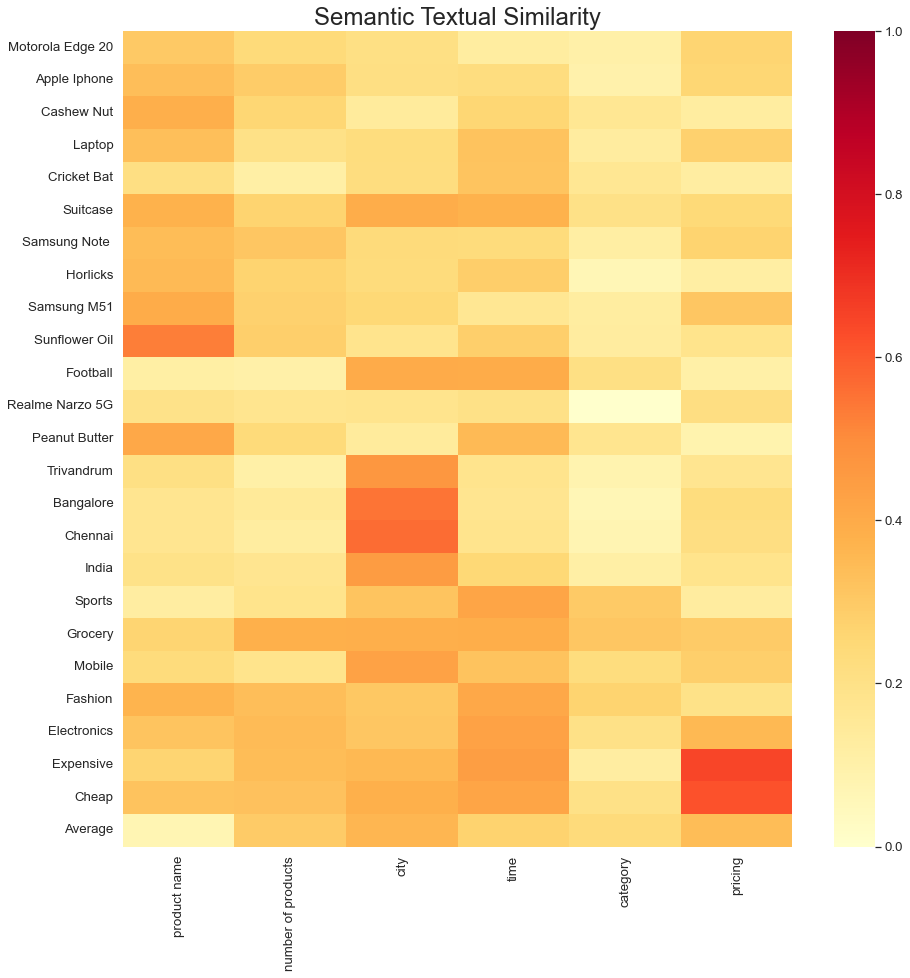

In [134]:
corr_matrix = use_model(db)

In [148]:
def find_category(corr_matrix_):
  i=0
  for item in corr_matrix_:
    temp = item.tolist()
    max_ = max(temp)
    #print('\n Max : ',max_)
    index_ = temp.index(max_)
    print(db[i]," ---- ", Slots[index_])
    i+=1

In [149]:
find_category(corr_matrix)

Motorola Edge 20  ----  product name
Apple Iphone  ----  product name
Cashew Nut  ----  product name
Laptop  ----  product name
Cricket Bat  ----  time
Suitcase  ----  city
Samsung Note   ----  product name
Horlicks  ----  product name
Samsung M51  ----  product name
Sunflower Oil  ----  product name
Football  ----  city
Realme Narzo 5G  ----  pricing
Peanut Butter  ----  product name
Trivandrum  ----  city
Bangalore  ----  city
Chennai  ----  city
India  ----  city
Sports  ----  time
Grocery  ----  time
Mobile  ----  city
Fashion  ----  time
Electronics  ----  time
Expensive  ----  pricing
Cheap  ----  pricing
Average  ----  city
